In [79]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(11,)


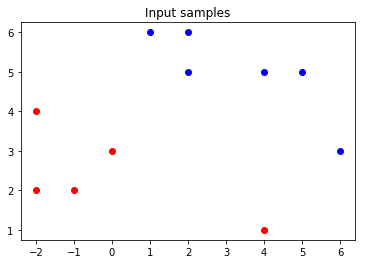

In [80]:
#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4, 1, -1],
    [0,3,-1],
    [-2,2,-1],
    [-1,2,-1],
    [1, 6, -1],
    [2, 5, -1],
    [6, 3, -1],
    [5,5,-1],
    [4,5,-1],
    [2,6,-1]
    
])

'''X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])'''

Y = np.array([-1,-1,-1,-1,-1,1,1,1,1,1,1])

plt.title("Input samples")
for d, sample in enumerate(X):
    if Y[d] == -1:
        plt.plot(sample[0],sample[1], 'ro')
    else:
        plt.plot(sample[0],sample[1],'bo' )




In SVM hinge loss is optimised or minimised.
c(X,Y,f(X)) = (1-Y*f(X))

if Y*f(X) = 1 hinge loss is 0 else hinge loss is 1

To minimise hinge loss, the loss function is diffrenciated.

if misclassified
w = w + eta(YX - 2 lambda w)

if correctly classified
w = w + eta(- 2 lambda w)

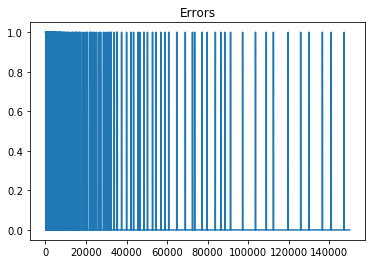

In [89]:
def svm_sgd(X,Y):
    w = np.zeros(X.shape[1])
    eta = 1
    epochs = 150000
    errors = []
    
    for epoch in range(1,epochs):
        error = 0
        for i,x in enumerate(X):
            #print(X[i],Y[i],w)
            if(Y[i]*np.dot(X[i],w)) < 1:
                w = w + eta * ( (X[i] * Y[i])  + (-2 * (1/epoch) * w))
                error = 1
            else:
                w = w +eta * (-2 * (1/epoch)*w)
        errors.append(error)
    plt.title("Errors")
    plt.plot(errors)
    plt.show()
    return w
w = svm_sgd(X,Y)

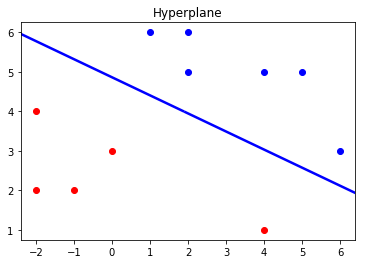

In [90]:
plt.title("Hyperplane")
for d, sample in enumerate(X):
    if Y[d] == -1:
        plt.plot(sample[0],sample[1], 'ro')
    else:
        plt.plot(sample[0],sample[1],'bo' )

x2 = [w[0],w[1],-w[1],w[0]]
x3 = [w[0],w[1],w[1],-w[0]]

x2x3 = np.array([x2,x3])
A,B,C,D = zip(*x2x3)
ax = plt.gca()
ax.quiver(A,B,C,D,scale=1,color="blue")